In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
train_data = pd.read_csv('/Users/alokroy/Documents/Programming/Projects/Amex/data/data/train_data_new.csv')
test_data = pd.read_csv('/Users/alokroy/Documents/Programming/Projects/Amex/data/data/test_data_new.csv')

In [3]:
train_data.head()

,team_wicket_loss_average,team_count_50runs_last15,team_winp_last5,team_bowler_performance_ratio,team_strike_rate,team_avg_wicket,team_batting_strength,team_win_rate_at_venue,team_batsman_performance_index,team_overall_win_rate,...,team_avg_eco,team_avg_score_ground_ratio,avg_score_ground_batting_first_ratio,match_experience_score_ratio,boundary_frequency_ratio,avg_runs_powerplay_ratio,total_wickets_bowlers_recent_ratio,total_runs_top_batsmen_recent_ratio,total_runs_top_batsmen_ratio,winner_01
0,-1.368785,1.210788,0.672131,1.244528,2.148438,1.238807,1.173089,7.071068e-01,1.972308,-0.083475,...,-0.554419,-0.104744,0.046338,1.368785,0.738186,0.115396,1.316632,1.178372,1.478076,1
1,-1.041201,0.564618,1.952381,-0.461919,-1.112081,-0.521669,-0.091446,1.490116e-08,-1.107182,0.854515,...,-0.285641,0.191746,0.416732,0.975199,-0.595941,0.247339,-0.893293,-0.088788,1.107182,0
2,0.485610,-0.232356,0.672131,0.615018,-0.497557,0.352594,-0.035741,1.490116e-08,-0.369545,-0.667032,...,-0.172086,0.349779,-0.418176,-1.494046,-0.244610,-0.470772,0.618219,-0.035741,-1.396318,0
3,0.003970,1.432296,1.975610,-0.485610,1.162619,-0.527744,1.285775,1.490116e-08,0.762741,0.324563,...,-0.531796,0.274726,1.279749,-0.453102,0.375219,0.913194,-0.406649,1.291848,-0.220136,0
4,1.589567,-0.294019,1.327869,0.366713,0.222848,0.041039,-0.080819,1.000000e+00,0.225562,-0.738186,...,0.204372,-0.776981,-0.846914,-0.435573,-0.476694,0.521669,0.068874,0.206596,-0.461919,1


In [4]:
import seaborn as sns
import matplotlib.pyplot as plt

def plot_density(train_data, test_data, column_name):

    title = f"'Density Plot of {column_name}"
    xlabel = column_name
    ylabel = 'Density'
   
    plt.figure(figsize=(10, 6))
    sns.kdeplot(train_data[column_name], fill=True, label='Train Data')
    sns.kdeplot(test_data[column_name], fill=True, label='Test Data')
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.legend()
    plt.show()

In [5]:
# plot_density(train_data, test_data, 'team_wicket_loss_average')

In [6]:
# for col in train_data.columns:
#     plot_density(train_data, test_data, col)

In [7]:
train_data.corr()['winner_01'].sort_values()

avg_score_ground_batting_first_ratio   -0.226530
team_avg_score_ground_ratio            -0.219863
team_win_percentage_fielding_first     -0.219447
match_experience_score_ratio           -0.219131
team_batting_strength                  -0.190013
total_runs_top_batsmen_recent_ratio    -0.186817
team_batsman_runs_recent               -0.186817
total_runs_top_batsmen_ratio           -0.182399
team_bowler_performance_ratio          -0.166911
team_batsman_performance_recent        -0.160832
team_avg_wicket                        -0.157641
team_pom_frequency                     -0.157227
team_avg_wickets_top5_bowlers          -0.151704
team_count_50runs_last15               -0.147812
total_wickets_bowlers_recent_ratio     -0.145209
boundary_frequency_ratio               -0.143416
avg_runs_powerplay_ratio               -0.142774
team_strike_rate                       -0.132729
team_count_100runs_ratio_last15        -0.126637
team_batsman_performance_index         -0.110905
team_SR             

## Feature Selection

### 1. Recursive Feature Elimination (RFE)

In [8]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import RFE
from sklearn.impute import SimpleImputer

# Define the features and target variable
X = train_data.drop('winner_01', axis=1)  # Assuming 'winner_01' is the target variable
y = train_data['winner_01']

# Handle missing values by imputing with the median
imputer = SimpleImputer(strategy='median')
X_imputed = imputer.fit_transform(X)

# Convert the imputed array back to a DataFrame
X_imputed_df = pd.DataFrame(X_imputed, columns=X.columns)

# Split the dataset into training and validation sets
# X_train, X_val, y_train, y_val = train_test_split(X_imputed_df, y, test_size=0.0, random_state=42)
X_train = X_imputed_df
y_train = y

# Create a RandomForest classifier to use with RFE
model = RandomForestClassifier(n_estimators=100, random_state=42)

# RFE with RandomForest for the top 15 features
rfe = RFE(estimator=model, n_features_to_select=10)
rfe.fit(X_train, y_train)

# Get the selected features
selected_features = X.columns[rfe.support_]

# Print selected features
print("Selected features:", selected_features)

# Model training can be done here using the selected features
# For example:
# X_train_selected = X_train[selected_features]
# X_val_selected = X_val[selected_features]


Selected features: Index(['team_bowler_performance_ratio', 'team_batting_strength',
       'team_pom_frequency', 'team_win_percentage_fielding_first',
       'team_avg_runs_1st_inning', 'team_SR', 'team_avg_eco',
       'team_avg_score_ground_ratio', 'avg_score_ground_batting_first_ratio',
       'match_experience_score_ratio'],
      dtype='object')


Selected features: Index(['team_bowler_performance_ratio', 'team_strike_rate', 'team_avg_wicket',
       'team_batting_strength', 'team_batsman_performance_recent',
       'team_pom_frequency', 'team_win_percentage_fielding_first',
       'team_avg_runs_1st_inning', 'team_SR', 'team_avg_eco',
       'team_avg_score_ground_ratio', 'avg_score_ground_batting_first_ratio',
       'match_experience_score_ratio', 'boundary_frequency_ratio',
       'avg_runs_powerplay_ratio'],
      dtype='object')

## Model

In [9]:
train_data.fillna(0, inplace=True)
df = train_data[selected_features]

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X = df
y = train_data['winner_01']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((758, 10), (758,), (190, 10), (190,))

In [10]:
from xgboost import XGBClassifier
from catboost import CatBoostClassifier

from sklearn.metrics import accuracy_score

### Catboost

In [11]:
catboost_parms = {'iterations': 90, 
                  'learning_rate': 0.00018252773305712697, 
                  'depth': 6, 
                  'l2_leaf_reg': 0.0012314643153008098, 
                  'border_count': 108,
                  'bagging_temperature': 0.046217755894046024, 
                  'random_strength': 0.1058457108867618, 
                  'od_type': 'Iter', 
                  'od_wait': 40}

best_catboost = CatBoostClassifier(**catboost_parms)

best_catboost.fit(X_train, y_train)

pred_train = best_catboost.predict(X_train)
print(f"Accuracy on train data: {accuracy_score(y_train, pred_train)}")

pred_test = best_catboost.predict(X_test)
print(f"Accuracy on test data: {accuracy_score(y_test, pred_test)}")

0:	learn: 0.6931185	total: 58.1ms	remaining: 5.17s
1:	learn: 0.6930909	total: 58.8ms	remaining: 2.59s
2:	learn: 0.6930555	total: 59.4ms	remaining: 1.72s
3:	learn: 0.6930182	total: 59.9ms	remaining: 1.29s
4:	learn: 0.6929885	total: 60.4ms	remaining: 1.03s
5:	learn: 0.6929587	total: 61ms	remaining: 854ms
6:	learn: 0.6929320	total: 61.6ms	remaining: 730ms
7:	learn: 0.6928977	total: 62ms	remaining: 636ms
8:	learn: 0.6928654	total: 62.6ms	remaining: 563ms
9:	learn: 0.6928314	total: 63.3ms	remaining: 506ms
10:	learn: 0.6928024	total: 63.8ms	remaining: 458ms
11:	learn: 0.6927667	total: 64.3ms	remaining: 418ms
12:	learn: 0.6927324	total: 64.9ms	remaining: 384ms
13:	learn: 0.6926967	total: 65.4ms	remaining: 355ms
14:	learn: 0.6926668	total: 65.8ms	remaining: 329ms
15:	learn: 0.6926374	total: 66.3ms	remaining: 307ms
16:	learn: 0.6926084	total: 66.9ms	remaining: 287ms
17:	learn: 0.6925791	total: 67.4ms	remaining: 270ms
18:	learn: 0.6925475	total: 67.9ms	remaining: 254ms
19:	learn: 0.6925132	total

## Check

In [12]:
df_test = test_data[selected_features]
df_test.fillna(0, inplace=True)

scaler = StandardScaler()
X= scaler.fit_transform(X)
test = scaler.transform(df_test)

/var/folders/z7/t3qmw89j637f4y58ls6cb_vh0000gn/T/ipykernel_91976/1287964554.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test.fillna(0, inplace=True)


In [13]:
check_model = best_catboost

In [14]:
check_model.fit(X, y)

pred_train = check_model.predict(X)
print(f"Accuracy on train data: {accuracy_score(y, pred_train)}")

0:	learn: 0.6931181	total: 2.6ms	remaining: 232ms
1:	learn: 0.6930871	total: 3.52ms	remaining: 155ms
2:	learn: 0.6930549	total: 4.08ms	remaining: 118ms
3:	learn: 0.6930248	total: 4.59ms	remaining: 98.6ms
4:	learn: 0.6929942	total: 5.12ms	remaining: 87.1ms
5:	learn: 0.6929619	total: 5.63ms	remaining: 78.8ms
6:	learn: 0.6929315	total: 6.28ms	remaining: 74.4ms
7:	learn: 0.6929025	total: 6.8ms	remaining: 69.8ms
8:	learn: 0.6928716	total: 7.34ms	remaining: 66.1ms
9:	learn: 0.6928391	total: 7.95ms	remaining: 63.6ms
10:	learn: 0.6928112	total: 8.5ms	remaining: 61ms
11:	learn: 0.6927828	total: 9.2ms	remaining: 59.8ms
12:	learn: 0.6927512	total: 9.8ms	remaining: 58ms
13:	learn: 0.6927212	total: 10.5ms	remaining: 56.9ms
14:	learn: 0.6926880	total: 11.2ms	remaining: 56ms
15:	learn: 0.6926623	total: 11.8ms	remaining: 54.4ms
16:	learn: 0.6926310	total: 12.4ms	remaining: 53.4ms
17:	learn: 0.6926004	total: 13ms	remaining: 52.1ms
18:	learn: 0.6925704	total: 13.7ms	remaining: 51.1ms
19:	learn: 0.692537

In [15]:
best_pred = np.array([1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0,
                    0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
                    0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1,
                    0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
                    0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1,
                    0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0,
                    0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0,
                    1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0,
                    1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1,
                    0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1,
                    1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0,
                    0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0,
                    0, 0, 1, 1, 0, 0, 0])

In [49]:
best_pred = pd.DataFrame(best_pred, columns=['best_pred'])

best_pred.to_csv('best_pred.csv', index=False)

In [16]:
preds = check_model.predict(test)

In [17]:
preds

array([1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0,
       0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1,
       0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0,
       1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1,
       1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0,
       0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 1, 0, 0, 0])

In [18]:
(preds!=best_pred).sum()

22

In [19]:
result = np.where(best_pred != preds, -1, 0)

In [20]:
result

array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0, -1, -1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0, -1, -1,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0, -1,  0,  0, -1,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, -1,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0, -1,  0,  0, -1,  0,  0, -1,  0,
        0,  0,  0,  0,  0,  0,  0, -1, -1,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0, -1, -1,  0,  0,  0,
        0,  0,  0,  0,  0, -1,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0

In [21]:
pred_prob = check_model.predict_proba(test)

In [22]:
pred_prob

array([[0.49430182, 0.50569818],
       [0.50027534, 0.49972466],
       [0.49845773, 0.50154227],
       [0.50060275, 0.49939725],
       [0.50158668, 0.49841332],
       [0.50190517, 0.49809483],
       [0.49567833, 0.50432167],
       [0.50204158, 0.49795842],
       [0.50198111, 0.49801889],
       [0.5012673 , 0.4987327 ],
       [0.50213095, 0.49786905],
       [0.50291332, 0.49708668],
       [0.49957184, 0.50042816],
       [0.5009523 , 0.4990477 ],
       [0.49541155, 0.50458845],
       [0.50126225, 0.49873775],
       [0.49757522, 0.50242478],
       [0.49902606, 0.50097394],
       [0.5006461 , 0.4993539 ],
       [0.49817137, 0.50182863],
       [0.50139607, 0.49860393],
       [0.50213648, 0.49786352],
       [0.50172562, 0.49827438],
       [0.49586703, 0.50413297],
       [0.49557239, 0.50442761],
       [0.49594161, 0.50405839],
       [0.49578971, 0.50421029],
       [0.50144514, 0.49855486],
       [0.49581246, 0.50418754],
       [0.50249176, 0.49750824],
       [0.

In [23]:
pred_prob[:, 1]

array([0.50569818, 0.49972466, 0.50154227, 0.49939725, 0.49841332,
       0.49809483, 0.50432167, 0.49795842, 0.49801889, 0.4987327 ,
       0.49786905, 0.49708668, 0.50042816, 0.4990477 , 0.50458845,
       0.49873775, 0.50242478, 0.50097394, 0.4993539 , 0.50182863,
       0.49860393, 0.49786352, 0.49827438, 0.50413297, 0.50442761,
       0.50405839, 0.50421029, 0.49855486, 0.50418754, 0.49750824,
       0.50293432, 0.49743689, 0.49699708, 0.50078481, 0.49888111,
       0.49756387, 0.49742185, 0.50070436, 0.50087661, 0.49883712,
       0.49787821, 0.49892064, 0.49698511, 0.49896723, 0.49832547,
       0.50353311, 0.50406098, 0.49762863, 0.4979272 , 0.50328709,
       0.49894704, 0.49779493, 0.49729477, 0.50279114, 0.49785228,
       0.49915632, 0.50047784, 0.49938065, 0.50413772, 0.50023412,
       0.49823643, 0.49740338, 0.49795117, 0.49893424, 0.50004117,
       0.50426725, 0.49780659, 0.50395409, 0.49842684, 0.49812393,
       0.50012518, 0.50364233, 0.50075366, 0.50491974, 0.50488

/opt/homebrew/Caskroom/miniforge/base/envs/amex/lib/python3.12/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/homebrew/Caskroom/miniforge/base/envs/amex/lib/python3.12/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/homebrew/Caskroom/miniforge/base/envs/amex/lib/python3.12/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


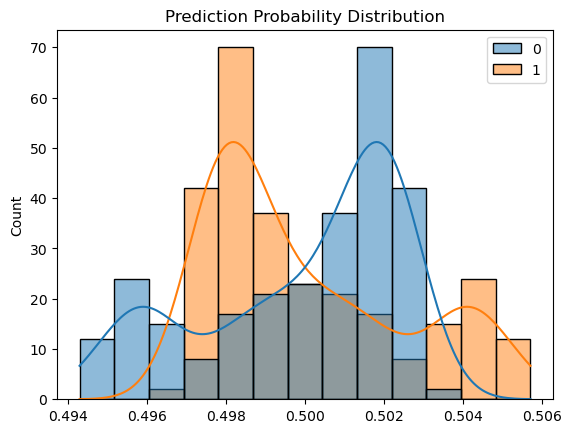

In [24]:
sns.histplot(pred_prob, kde=True)
plt.title('Prediction Probability Distribution')
plt.show()

## Sub

In [25]:
train_df = pd.read_csv('/Users/alokroy/Documents/Programming/Projects/Amex/data/main/663e2b6d54457_train_data_with_samplefeatures.csv')
test_df = pd.read_csv('/Users/alokroy/Documents/Programming/Projects/Amex/data/main/6644a1e287df6_test_data_with_samplefeatures.csv')

In [26]:
final_model = best_catboost
X_final = X
X_sub_final = test

In [27]:
train_df['win_pred_score'] = final_model.predict_proba(X_final)[:,1]
test_df['win_pred_score'] = final_model.predict_proba(X_sub_final)[:,1]

In [28]:
train_df['winner_01'] = train_df.apply(lambda x: 0 if (x['team1']==x['winner']) else 1, axis=1)

In [29]:
train_df['y_pred_01'] = final_model.predict(X_final)
test_df['y_pred_01'] = final_model.predict(X_sub_final)

In [30]:
train_df['win_pred_score'] = np.where( (train_df['y_pred_01']==0), (1-train_df['win_pred_score']), train_df['win_pred_score'])
test_df['win_pred_score'] = np.where( (test_df['y_pred_01']==0), (1-test_df['win_pred_score']), test_df['win_pred_score'])

In [31]:
train_df['win_pred_team_id'] = np.where( (train_df['y_pred_01']==0), (train_df['team1_id']), train_df['team2_id'])
test_df['win_pred_team_id'] = np.where( (test_df['y_pred_01']==0), (test_df['team1_id']), test_df['team2_id'])

In [32]:
X = pd.DataFrame(X)

In [33]:
X.columns = selected_features

In [34]:
df_feat_importance = pd.DataFrame({'feat_name':X.columns.tolist(), 'model_feat_imp_train':final_model.feature_importances_}).sort_values(by='model_feat_imp_train', ascending=False)\
                                                                                                                        .reset_index(drop=True).head(10)
df_feat_importance

,feat_name,model_feat_imp_train
0,team_win_percentage_fielding_first,24.438776
1,team_avg_score_ground_ratio,18.210790
2,match_experience_score_ratio,16.189488
3,team_avg_eco,7.265509
4,team_avg_runs_1st_inning,6.466717
5,team_pom_frequency,6.409121
6,team_bowler_performance_ratio,6.392610
7,team_batting_strength,5.210847
8,team_SR,4.789888
9,avg_score_ground_batting_first_ratio,4.626254


In [35]:
train_df['dataset_type'] = 'train'
test_df['dataset_type'] = 'r1'

### Params

In [36]:
catboost_parms

{'iterations': 90,
 'learning_rate': 0.00018252773305712697,
 'depth': 6,
 'l2_leaf_reg': 0.0012314643153008098,
 'border_count': 108,
 'bagging_temperature': 0.046217755894046024,
 'random_strength': 0.1058457108867618,
 'od_type': 'Iter',
 'od_wait': 40}

In [37]:
algo_name = 'CatBoost'
is_ensemble = 'no'
n_trees = catboost_parms['iterations']
depth = catboost_parms['depth']
lr = catboost_parms['learning_rate']

In [38]:
train_df[selected_features] = train_data[selected_features]
test_df[selected_features] = test_data[selected_features]

In [39]:
df_file1 = pd.concat([test_df[['match id','dataset_type','win_pred_team_id','win_pred_score',] + list(df_feat_importance['feat_name'].head(10))], \
                     train_df[['match id','dataset_type','win_pred_team_id','win_pred_score',] + list(df_feat_importance['feat_name'].head(10))]])

renaming_dict = {}
for i,col in enumerate(list(df_feat_importance['feat_name'].head(10))):
    renaming_dict[col] = f'indep_feat_id{i+1}'
df_file1.rename(columns=renaming_dict, inplace=True)

for i in range(1,11):
    if f'indep_feat_id{i}' not in df_file1.columns:
        df_file1[f'indep_feat_id{i}'] = np.nan

df_file1['train_algorithm'] = algo_name
df_file1['is_ensemble'] = is_ensemble
df_file1['train_hps_trees'] = n_trees
df_file1['train_hps_depth'] = depth
df_file1['train_hps_lr'] = lr

In [40]:
df_file1.shape
df_file1.head()

,match id,dataset_type,win_pred_team_id,win_pred_score,indep_feat_id1,indep_feat_id2,indep_feat_id3,indep_feat_id4,indep_feat_id5,indep_feat_id6,indep_feat_id7,indep_feat_id8,indep_feat_id9,indep_feat_id10,train_algorithm,is_ensemble,train_hps_trees,train_hps_depth,train_hps_lr
0,9250275,r1,90,0.505698,-5.199338,-1.663025,-2.240457,NaN,NaN,-5.199338,-2.437639,-2.094242,-1.653190,-5.199338,CatBoost,no,90,6,0.000183
1,9262189,r1,36084,0.500275,0.010588,-0.611823,-0.563325,-0.113165,-1.212195,1.086717,-0.811828,-0.325417,0.572029,-0.667032,CatBoost,no,90,6,0.000183
2,9128776,r1,48334,0.501542,-1.142620,-0.512592,0.197558,1.273120,-0.468937,-0.067659,0.081007,0.064856,-0.681899,-0.992377,CatBoost,no,90,6,0.000183
3,9586919,r1,36098,0.500603,0.112732,0.048988,0.156956,-0.464157,0.214040,-0.956295,0.807969,-1.053848,-1.802690,0.041039,CatBoost,no,90,6,0.000183
4,9128538,r1,30414,0.501587,0.010588,0.067548,0.664330,0.728818,0.169415,1.244310,0.160676,1.258686,0.407025,0.212007,CatBoost,no,90,6,0.000183


In [41]:
sub_cols = ['match id', 'dataset_type', 'win_pred_team_id', 'win_pred_score',
            'train_algorithm', 'is_ensemble', 'train_hps_trees', 'train_hps_depth', 'train_hps_lr',
            'indep_feat_id1', 'indep_feat_id2', 'indep_feat_id3', 'indep_feat_id4',
            'indep_feat_id5', 'indep_feat_id6', 'indep_feat_id7', 'indep_feat_id8',
            'indep_feat_id9', 'indep_feat_id10']

In [42]:
df_file1 = df_file1[sub_cols]

### File 2

In [43]:
feature_desc = {
    'team_bowler_performance_ratio': 'A ratio or index measuring the overall performance of the team\'s bowlers, considering metrics such as bowling average, economy rate, strike rate, and wickets taken.',
    'team_batting_strength': 'An index representing the strength of the team\'s batting lineup, derived from factors such as batting averages, strike rates, and key batsmen performances.',
    'team_pom_frequency': 'Frequency of players from the team winning the Player of the Match award, indicating the impact individual players have on matches.',
    'team_win_percentage_fielding_first': 'The percentage of matches the team wins when they field first, showing the team\'s effectiveness in defending scores set by the opposition.',
    'team_avg_runs_1st_inning': 'The average number of runs the team scores in the first innings, reflecting their batting performance when they bat first.',
    'team_SR': 'The batting strike rate of the team, calculated as the average number of runs scored per 100 balls faced.',
    'team_avg_eco': 'The average economy rate of the team\'s bowlers, indicating the average number of runs conceded per over.',
    'team_avg_score_ground_ratio': 'A ratio comparing the team\'s average score on a particular ground to the average score of all teams on that ground, showing how well the team performs at specific venues.',
    'avg_score_ground_batting_first_ratio': 'A ratio comparing the team\'s average score when batting first on a specific ground to the general average score when batting first on that ground, providing insights into the team\'s first-innings batting performance at different venues.',
    'match_experience_score_ratio': 'A ratio measuring the overall experience of the team in terms of matches played, taking into account the number of matches played by the players in the team.'
}

In [44]:
# df_feat_importance.rename(index={0:'feat_id'}, inplace=True)
df_file2 = df_feat_importance
df_file2['feat_id'] = [i+1 for i in df_file2.index]
df_file2['feat_rank_train'] = [i+1 for i in df_file2.index]
df_file2 = df_file2.set_index('feat_id')
df_file2['feat_description'] = df_file2['feat_name'].map(feature_desc)

In [45]:
df_file2

,feat_name,model_feat_imp_train,feat_rank_train,feat_description
feat_id,,,,
1,team_win_percentage_fielding_first,24.438776,1,The percentage of matches the team wins when t...
2,team_avg_score_ground_ratio,18.210790,2,A ratio comparing the team's average score on ...
3,match_experience_score_ratio,16.189488,3,A ratio measuring the overall experience of th...
4,team_avg_eco,7.265509,4,The average economy rate of the team's bowlers...
5,team_avg_runs_1st_inning,6.466717,5,The average number of runs the team scores in ...
6,team_pom_frequency,6.409121,6,Frequency of players from the team winning the...
7,team_bowler_performance_ratio,6.392610,7,A ratio or index measuring the overall perform...
8,team_batting_strength,5.210847,8,An index representing the strength of the team...
9,team_SR,4.789888,9,"The batting strike rate of the team, calculate..."


In [46]:
df_file1.fillna(0, inplace=True)

In [47]:
df_file1.to_csv('Submission_file001.csv', index=False)
df_file2.to_csv('Submission_file002.csv')